In [83]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
housing_data = pd.read_csv('HousingData.xls')

In [85]:
housing_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [86]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [87]:
housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### Replace the missing value by median

In [88]:
## method 1 --> doing by directly passing the column names
for columns in ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']:
    housing_data[columns] = housing_data[columns].fillna(housing_data[columns].median())

In [89]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [37]:
## method 2 --> Fetching all the columns and checking for condition if there are any nulls in the columns
for column in housing_data.columns:
    if (housing_data[column].isnull().sum() > 0):
        housing_data[column]= housing_data[column].fillna(housing_data[column].median)

In [35]:
housing_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [39]:
housing_data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [21]:
housing_data.columns[1]

'ZN'

In [11]:
CRIM_column_missing_info=housing_data['CRIM'].isnull()

In [41]:
##housing_data[CRIM_column_missing_info]

In [42]:
##ZN_column_missing_info=housing_data['ZN'].isnull()
##housing_data[ZN_column_missing_info]

In [ ]:
##INDUS_column_missing_info=housing_data['INDUS'].isnull()
##housing_data[INDUS_column_missing_info]

In [ ]:
##CHAS_column_missing_info=housing_data['CHAS'].isnull()

In [ ]:
##AGE_column_missing_info=housing_data['AGE'].isnull()

In [ ]:
##LSTAT_column_missing_info=housing_data['LSTAT'].isnull()

In [44]:
##housing_data['CRIM'].value_counts().sum()

In [43]:
##housing_data.describe()

### Plotting histogram

In [45]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>]],
      dtype=object)

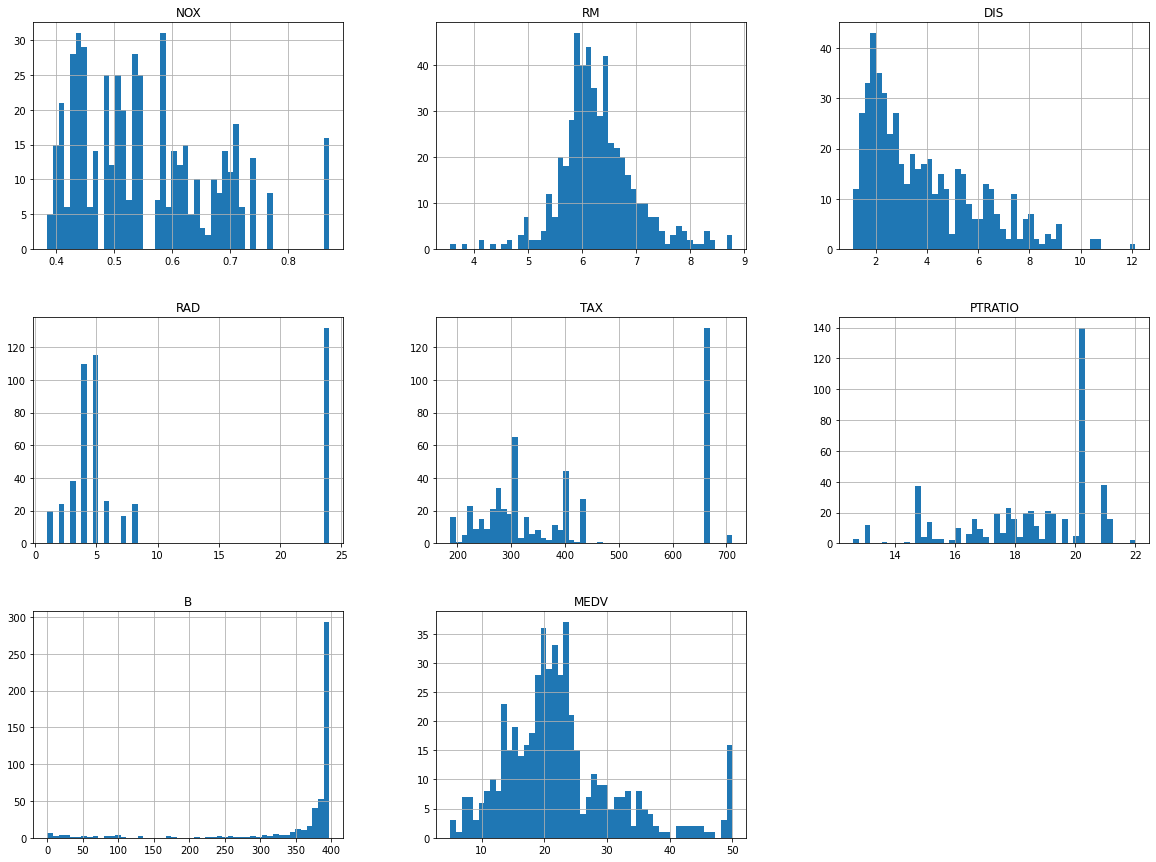

In [48]:
housing_data.hist(bins=50, figsize=(20,15))

In [50]:
housing_data.shape

(506, 14)

### Train test split

### Creating our own train test split module for learning purpose

In [54]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))  ## Used for shuffling data. Creates a permutated sequence or array.
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [55]:
train_set, test_set = split_train_test(housing_data, 0.2)

In [56]:
print(f"Rows in train set {len(train_set)}\n Rows in test set {len(test_set)}")

Rows in train set 405
 Rows in test set 101


### Using original module from sklearn

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_data.iloc[:,:13],housing_data.iloc[:,13],test_size = 0.2, random_state=42)

In [79]:
X_train.shape

(404, 13)

In [80]:
X_test.shape

(102, 13)

In [81]:
y_train.shape

(404,)

In [82]:
y_test.shape

(102,)

In [90]:
### As per harry code

train_set,test_set = train_test_split(housing_data,test_size = 0.2, random_state = 42 )

In [91]:
train_set.shape

(404, 14)

In [92]:
test_set.shape

(102, 14)

### Use stratified shuffle so that data from the whole population is shuffled and fed to both train and test set. This is useful because we do want to feed the model with all types of patterns present in the dataset. This gives a similar proportion of split for both train and test

In [93]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index  in split.split(housing_data,housing_data['CHAS']):
    strat_train_set = housing_data.loc[train_index]
    start_test_set = housing_data.loc[test_index]

### Looking for correlations

We sued pearson correlation here. This wil give if output increases or decreases with increase in input

1 --> Strong positive correlation
0 --> Strong negative correlation

In [95]:
corr_matrix = housing_data.corr()

In [96]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64

### Plot correlation using scatter plot for few columns

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

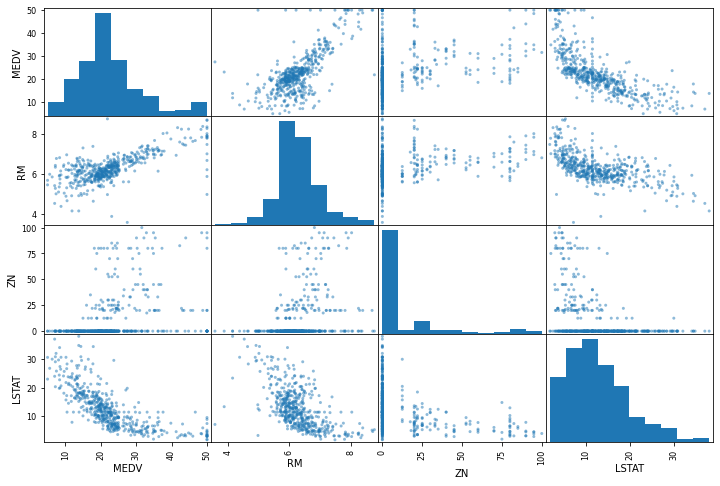

In [98]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing_data[attributes],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

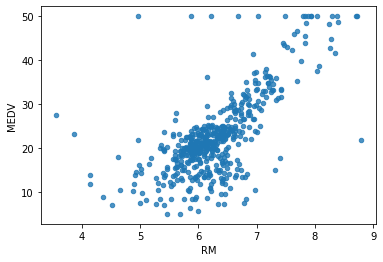

In [99]:
housing_data.plot(kind="scatter",x='RM',y='MEDV',alpha=0.8)

### Trying out attribute combination

Creating a new column called tax per room just to try out things

In [100]:
housing_data['TAXRM'] = housing_data['TAX']/housing_data['RM']

In [102]:
housing_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2,31.061984


In [104]:
corr_matrix = housing_data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.723093
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

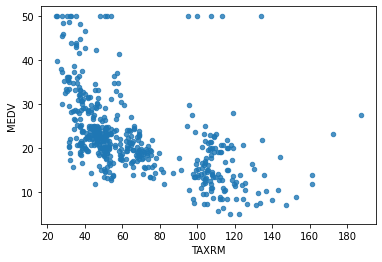

In [105]:
housing_data.plot(kind="scatter", x="TAXRM",y="MEDV",alpha=0.8)

### Handling missing attributes

#### To take care of missing attributes, we have 3 options

1) Get rid of missing data points
2) Get rid of whole attribute
3) Set value to some value(0,mean,median)

In [ ]:
a = housing_data.dropna(subset=['RM']) ## option 1
a.shape

In [ ]:
housing.drop("RM",axis=1) ## option 2


In [ ]:
## Replacing missing value with median  
median = housing_data["RM"].median() ## option 3

In [ ]:
housing_data["RM"].fillna(median)

### we can do the same thing using sklearn imputor class

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

### fitting this to our data
imputer.fit(housing_data)

In [ ]:
imputer.statistics_   ## Gives values of median for all the columns

In [ ]:
### Creating a pipeline to take care of missing values in any of the columns
X = imputer.transform(housing_data)   ## Gives numpy array as output

### Scikit-learn Design

Primarily 3 types of objects

1) Estimators --> To estimate some parameter based on a dataset. Ex: Imputer
It has a fit and transform method.
Fit --> fits the dataset and calculates internal parameters. Used to learn parameters from training data.
Transform --> 
2) Transformers --> Takes input and returns output based on learnings from fit. It also has a convenience function called fit_transform. 
3) Predictors --> Linear regression